# Required Libraries


In [2]:
import scipy
import sklearn.svm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.linear_model, sklearn.datasets
from sklearn import kernel_ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Loading the combined test and train datasets for regression

To be able to preprocess the datasets more efficiently, train and test datasets have been combined and will be seperated according to their orginal lengths (800/220) in the model fitting section.

In [3]:
#Getting the combined housing_coursework test and training dataset
housingData = pd.read_csv('/housing_coursework_data.csv')

df = pd.DataFrame(data= housingData)

display(df)

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.21,37.83,34,5065,788.0,1627,766,6.8976,333300,NEAR BAY
1,2,-122.22,37.77,52,391,128.0,520,138,1.6471,95000,NEAR BAY
2,3,-122.23,37.79,30,610,145.0,425,140,1.6198,122700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
1015,1016,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
1016,1017,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
1017,1018,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND
1018,1019,-122.03,38.69,23,1796,380.0,939,330,2.7955,96300,INLAND


# Preprocessing

To be able to get a more accurate result, we must prepare the dataset to fit into our models.

In [4]:
df = df.drop(columns=['No.', 'longitude', 'latitude'])
display(df.head())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,34,5065,788.0,1627,766,6.8976,333300,NEAR BAY
1,52,391,128.0,520,138,1.6471,95000,NEAR BAY
2,30,610,145.0,425,140,1.6198,122700,NEAR BAY
3,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [5]:
display(df.select_dtypes(include=np.number).head())
display(df.select_dtypes(exclude=np.number).head())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34,5065,788.0,1627,766,6.8976,333300
1,52,391,128.0,520,138,1.6471,95000
2,30,610,145.0,425,140,1.6198,122700
3,52,2300,443.0,1225,423,3.5398,158400
4,50,954,217.0,546,201,2.6667,172800


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [6]:
display(df.select_dtypes(include=np.number).describe())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1020.000000,1020.000000,1011.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,27.623529,2732.830392,556.577646,1474.960784,515.614706,3.955444,207407.886275
std,12.311122,2168.037719,423.168029,1116.843167,382.273122,1.957958,113710.061826
min,2.000000,19.000000,11.000000,34.000000,9.000000,0.536000,14999.000000
25%,17.000000,1482.000000,301.500000,807.500000,287.750000,2.607425,119600.000000
50%,28.000000,2206.500000,452.000000,1204.000000,427.000000,3.690750,184550.000000
75%,36.000000,3260.000000,672.500000,1815.750000,626.500000,4.856800,261075.000000
max,52.000000,27700.000000,4386.000000,15037.000000,4072.000000,15.000100,500001.000000


Removing lines that have empty data

In [7]:
print('Original dataset length:')
print(len(df))
df_nl = df.dropna()
print('Dataset length after removing all rows of missing data:')
print(len(df_nl))

Original dataset length:
1020
Dataset length after removing all rows of missing data:
1011


Removing outliers

<AxesSubplot:>

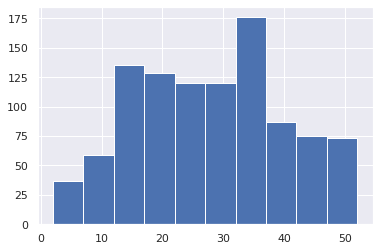

In [8]:
df_nl["housing_median_age"].hist()

<AxesSubplot:>

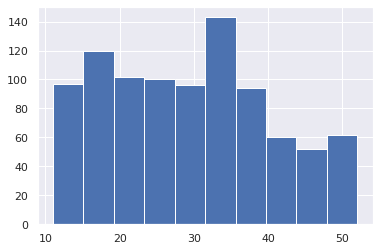

In [9]:
df_nl=df_nl[df_nl["housing_median_age"] > 10]
df_nl["housing_median_age"].hist()

<AxesSubplot:>

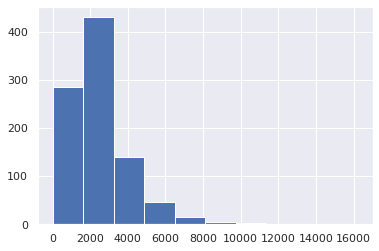

In [10]:
df_nl["total_rooms"].hist()

<AxesSubplot:>

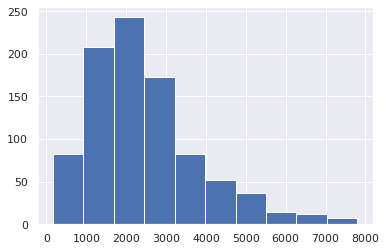

In [11]:
df_nl=df_nl[df_nl["total_rooms"] < 8000]
df_nl=df_nl[df_nl["total_rooms"] > 100]
df_nl["total_rooms"].hist()

<AxesSubplot:>

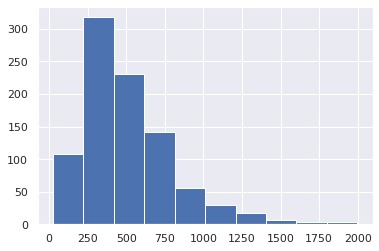

In [12]:
df_nl["total_bedrooms"].hist()

<AxesSubplot:>

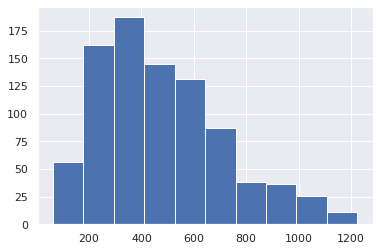

In [13]:
df_nl=df_nl[df_nl["total_bedrooms"] < 1250]
df_nl=df_nl[df_nl["total_bedrooms"] > 50]
df_nl["total_bedrooms"].hist()

<AxesSubplot:>

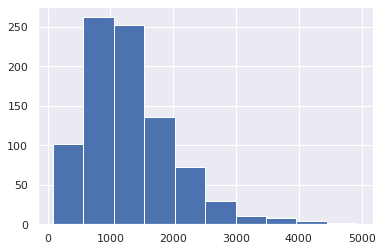

In [14]:
df_nl["population"].hist()

<AxesSubplot:>

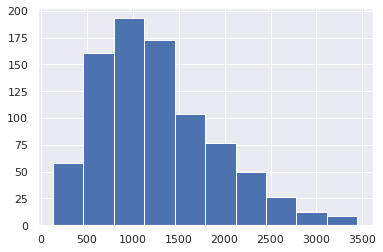

In [15]:
df_nl=df_nl[df_nl["population"] < 3500]
df_nl=df_nl[df_nl["population"] > 100]
df_nl["population"].hist()

<AxesSubplot:>

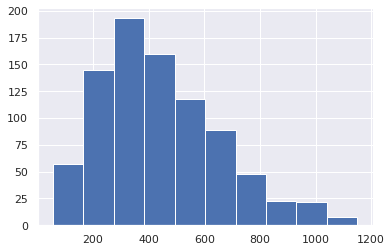

In [16]:
df_nl["households"].hist()

<AxesSubplot:>

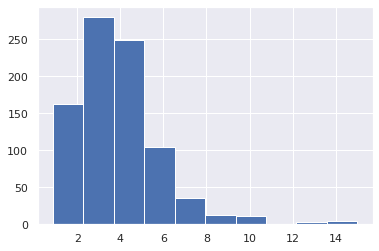

In [17]:
df_nl["median_income"].hist()

<AxesSubplot:>

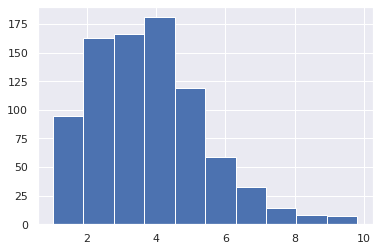

In [18]:
df_nl=df_nl[df_nl["median_income"] < 10]
df_nl=df_nl[df_nl["median_income"] > 1]
df_nl["median_income"].hist()

In [19]:
display(df_nl.select_dtypes(include=np.number).describe())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,29.990533,2335.127811,474.862722,1272.271006,444.531361,3.778673,202746.897041
std,10.893491,1189.606128,229.670442,634.104043,213.169515,1.614736,110577.971892
min,11.000000,296.000000,62.000000,131.000000,56.000000,1.011400,14999.000000
25%,21.000000,1456.000000,297.000000,801.000000,284.000000,2.559200,116500.000000
50%,30.000000,2127.000000,428.000000,1155.000000,411.000000,3.638900,182100.000000
75%,37.000000,2946.000000,612.000000,1643.000000,573.000000,4.701900,251800.000000
max,52.000000,7436.000000,1224.000000,3444.000000,1150.000000,9.814400,500001.000000


In [20]:
Xy_df = df_nl[['median_income', 'median_house_value']]

display(Xy_df)

,median_income,median_house_value
0,6.8976,333300
1,1.6471,95000
2,1.6198,122700
3,3.5398,158400
4,2.6667,172800
...,...,...
1012,3.9000,146900
1013,1.9510,152500
1014,4.7222,167200
1015,2.4167,225000


In [21]:
display(Xy_df.select_dtypes(include=np.number).describe())

,median_income,median_house_value
count,845.000000,845.000000
mean,3.778673,202746.897041
std,1.614736,110577.971892
min,1.011400,14999.000000
25%,2.559200,116500.000000
50%,3.638900,182100.000000
75%,4.701900,251800.000000
max,9.814400,500001.000000


# Univariate Linear Regression

In [22]:
X = np.array(Xy_df[['median_income']])
y = np.array(Xy_df['median_house_value'])

n_train_points = 645
n_new_points = 200

X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

In [23]:
obj = sklearn.linear_model.LinearRegression(fit_intercept=True) 

obj.fit(X_train, y_train)

y_pred = obj.predict(X_new)

print('theta_0:',obj.intercept_)
print('theta_1:',obj.coef_)

theta_0: 41075.503248247755
theta_1: [42343.37535385]


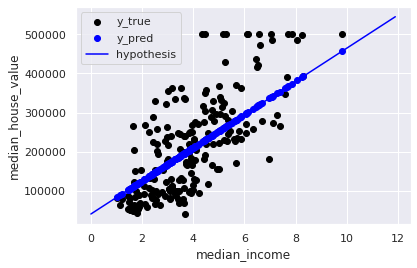

In [24]:
plt.scatter(X_new, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new, y_pred, color='blue', label='y_pred') # predicted y values
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend()
plt.show()

In [25]:
#The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))

#The R2 score
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Mean squared error loss: 7853511232.6919
R2 score: 0.5014


# Kernal Ridge Regression

In [26]:
X = np.array(Xy_df[['median_income']])
y = np.array(Xy_df['median_house_value'])

n_train_points = 645
n_new_points = 200

X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]

y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

obj = kernel_ridge.KernelRidge(kernel='rbf')

obj.fit(X_train, y_train)

y_pred = obj.predict(X_new)

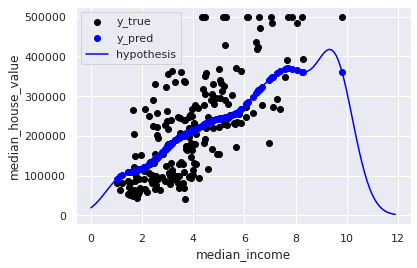

In [27]:
plt.scatter(X_new, y_true,  color='black', label='y_true')
plt.scatter(X_new, y_pred, color='blue', label='y_pred')
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.legend()
plt.show()

In [28]:
#The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))

#The R2 score
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Mean squared error loss: 8329636025.7743
R2 score: 0.4712


# Loading the combined test and train datasets for regression

To be able to preprocess the datasets more efficiently, train and test datasets have been combined and will be seperated according to their orginal lengths (650/241) in the model fitting section.

In [29]:
#Getting the combined Titanic test and training dataset
titanicData = pd.read_csv('/Titanic_data.csv')

sf = pd.DataFrame(data= titanicData)

display(sf)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target: Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


# Preprocessing

To be able to get a more accurate result, we must prepare the dataset to fit into our models.

In [30]:
sf = sf.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'])
display(sf.head())

,Pclass,Sex,Age,Embarked,Target: Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [31]:
display(sf.select_dtypes(include=np.number).head())
display(sf.select_dtypes(exclude=np.number).head())

,Pclass,Age,Target: Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


Determining if there is any mistypes or empty data

In [32]:
print(pd.unique(sf['Pclass']))
print(pd.unique(sf['Target: Survived']))
print(pd.unique(sf['Sex']))
print(pd.unique(sf['Embarked']))

[3 1 2]
[0 1]
['male' 'female']
['S' 'C' 'Q' nan]


In [33]:
display(sf.select_dtypes(include=np.number).describe())

,Pclass,Age,Target: Survived
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,0.383838
std,0.836071,14.526497,0.486592
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,38.000000,1.000000
max,3.000000,80.000000,1.000000


In [34]:
print('Original dataset length:')
print(len(sf))
sf_nl = sf.dropna()
print('Dataset length after removing all rows of missing data:')
print(len(sf_nl))

Original dataset length:
891
Dataset length after removing all rows of missing data:
712


<AxesSubplot:>

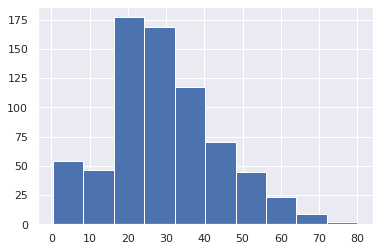

In [35]:
sf_nl["Age"].hist()

<AxesSubplot:>

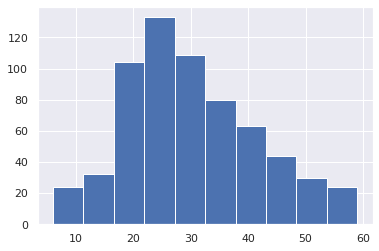

In [36]:
sf_nl=sf_nl[sf_nl["Age"] < 60]
sf_nl=sf_nl[sf_nl["Age"] > 5]
sf_nl["Age"].hist()

In [37]:
display(sf_nl.select_dtypes(include=np.number).describe())

,Pclass,Age,Target: Survived
count,643.000000,643.000000,643.000000
mean,2.244168,30.115863,0.390358
std,0.835976,11.466844,0.488210
min,1.000000,6.000000,0.000000
25%,1.000000,22.000000,0.000000
50%,3.000000,29.000000,0.000000
75%,3.000000,37.500000,1.000000
max,3.000000,59.000000,1.000000


In [38]:
sf_f = sf_nl.drop(columns=['Sex', 'Embarked'])
display(sf_f)

,Pclass,Age,Target: Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,0
886,2,27.0,0
887,1,19.0,1
889,1,26.0,1


Converting the dataset to arrays

In [39]:
dataset = sf_f
raw_X_sf = pd.DataFrame(data=dataset, columns=['Pclass', 'Age'])
raw_y_sf = pd.DataFrame(data=1 - (dataset['Target: Survived']), columns=['Target: Survived'])
raw_sf = pd.concat([raw_X_sf, raw_y_sf], axis=1)
#Shuffling the dataset
rng = np.random.default_rng(0)
Xy_sf = raw_sf.iloc[rng.permutation(len(raw_sf))].reset_index(drop=True)

display(Xy_sf)

,Pclass,Age,Target: Survived
0,3,19.0,1
1,1,22.0,0
2,2,19.0,0
3,2,23.0,1
4,2,23.0,1
...,...,...,...
638,3,19.0,0
639,2,24.0,0
640,1,30.0,0
641,1,42.0,0


# Conversion of data to NumPy arrays

In [40]:
#Preparing the NumPy ndarrays
Xs = np.array(Xy_sf[sf_f.columns[0:2]])
ys = np.array(Xy_sf['Target: Survived'])

n_train_points = 450
n_new_points = 193

#Splitting the data into training/new data
raw_X_train = Xs[:n_train_points]
raw_X_new = Xs[n_train_points:n_train_points+n_new_points]

#Splitting the targets into training/new data
y_train = ys[:n_train_points]
y_new = ys[n_train_points:n_train_points+n_new_points]

# Standardization

In [41]:
scaler = StandardScaler()
scaler.fit(raw_X_train)

X_train = scaler.transform(raw_X_train)
X_new=scaler.transform(raw_X_new)

# Decision Tree

Accuracy: 0.6788
Confusion matrix:  [[0.29015544 0.12953368]
 [0.19170984 0.38860104]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        81
           1       0.75      0.67      0.71       112

    accuracy                           0.68       193
   macro avg       0.68      0.68      0.68       193
weighted avg       0.69      0.68      0.68       193



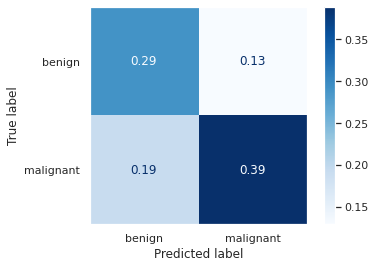

In [42]:
#Creating Decison Tree object
obj = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9,random_state=40)

#Training the model using the training sets
obj.fit(X_train, y_train)

#Making predictions using the testing set
y_new_pred = obj.predict(X_new)

#The accuracy score
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_new, y_new_pred)))

#Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_new, y_new_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)

#Visualizing the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)

#The classification report
print(sklearn.metrics.classification_report(y_new, y_new_pred))

# SVM

Creation of SVM object and predicting

In [43]:
#Creating the support vector classifier object
obj = sklearn.svm.SVC(C=1,kernel='rbf',random_state=40)

#Training the model using the training sets
obj.fit(X_train, y_train)

#Making predictions using the testing set
y_pred = obj.predict(X_new)

# Plotting SVM results

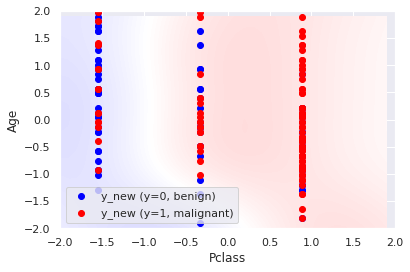

In [44]:
# Plotting the outputs
xrange = [-2, 2]
yrange = [-2, 2]
step = 0.1
x = np.arange(xrange[0], xrange[1], step)
y = np.arange(yrange[0], yrange[1], step)
xx, yy = np.meshgrid(x, y)
obj.set_params(decision_function_shape='ovo')
z = obj.decision_function(np.c_[xx.reshape([-1]), yy.reshape([-1])]).reshape(xx.shape)
plt.contourf(xx, yy, z, cmap='bwr', vmin=-10.0, vmax=10.0, levels=200)

X_new_neg = X_new[y_new==0, :]
X_new_pos = X_new[y_new==1, :]
plt.scatter(X_new_neg[:, 0], X_new_neg[:, 1],  color='blue', label='y_new (y=0, benign)')
plt.scatter(X_new_pos[:, 0], X_new_pos[:, 1],  color='red', label='y_new (y=1, malignant)')

plt.xlim(xrange)
plt.ylim(yrange)

plt.xlabel(sf_f.columns[0])
plt.ylabel(sf_f.columns[1])

plt.legend()

plt.show()

Accuracy: 0.6995
Confusion matrix:  [[0.21243523 0.20725389]
 [0.09326425 0.48704663]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        81
           1       0.70      0.84      0.76       112

    accuracy                           0.70       193
   macro avg       0.70      0.67      0.67       193
weighted avg       0.70      0.70      0.69       193



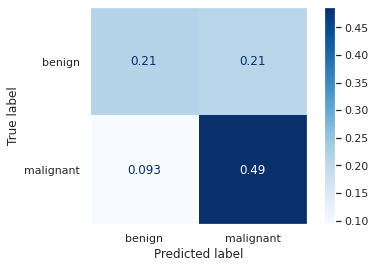

In [45]:
#The accuracy score
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_new, y_pred)))

#Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_new, y_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)

#Visualizing the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)

#The classification report
print(sklearn.metrics.classification_report(y_new, y_pred))